# Eksploracja i preprocessing danych zbioru "Bag of Words Data Set"
Julia Kaznowska, Piotr Wilczyński <br>
Politechnika Warszawska, Wydział Matematyki i Nauk Informacyjnych, Wstęp do uczenia maszynowego

## Opis zbioru danych

## Import niezbędnych bibliotek

In [91]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
import pickle
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix
from itertools import chain
import tqdm
from collections import defaultdict

# wyświetlanie wizualizacji
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import danych i preprocessing

In [3]:
enron_vocab = []
with open('data/vocab.enron.txt', 'r', encoding='utf-8') as file:
    for line in file:
        enron_vocab.append(line.strip())
        
kos_vocab = []
with open('data/vocab.kos.txt', 'r', encoding='utf-8') as file:
    for line in file:
        kos_vocab.append(line.strip())
        
nips_vocab = []
with open('data/vocab.nips.txt', 'r', encoding='utf-8') as file:
    for line in file:
        nips_vocab.append(line.strip())
        
nytimes_vocab = []
with open('data/vocab.nytimes.txt', 'r', encoding='utf-8') as file:
    for line in file:
        nytimes_vocab.append(line.strip())
        
pubmed_vocab = []
with open('data/vocab.pubmed.txt', 'r', encoding='utf-8') as file:
    for line in file:
        pubmed_vocab.append(line.strip())

In [52]:
with open('data/docword.enron.txt', 'r', encoding='utf-8') as file:
    enron_D = int(file.readline())
    enron_W = int(file.readline())
    enron_NNZ = int(file.readline())
    enron_dict_list = np.array([{} for _ in range(enron_D)])
    for line in file:
        row = line.strip().split()
        doc_id = int(row[0]) - 1
        word_id = int(row[1]) - 1
        count = int(row[2])
        enron_dict_list[doc_id][enron_vocab[word_id]] = count
        
with open('data/docword.kos.txt', 'r', encoding='utf-8') as file:
    kos_D = int(file.readline())
    kos_W = int(file.readline())
    kos_NNZ = int(file.readline())
    kos_dict_list = np.array([{} for _ in range(kos_D)])
    for line in file:
        row = line.strip().split()
        doc_id = int(row[0]) - 1
        word_id = int(row[1]) - 1
        count = int(row[2])
        kos_dict_list[doc_id][kos_vocab[word_id]] = count
        
with open('data/docword.nips.txt', 'r', encoding='utf-8') as file:
    nips_D = int(file.readline())
    nips_W = int(file.readline())
    nips_NNZ = int(file.readline())
    nips_dict_list = np.array([{} for _ in range(nips_D)])
    for line in file:
        row = line.strip().split()
        doc_id = int(row[0]) - 1
        word_id = int(row[1]) - 1s
        count = int(row[2])
        nips_dict_list[doc_id][nips_vocab[word_id]] = count
        
with open('data/docword.nytimes.txt', 'r', encoding='utf-8') as file:
    nytimes_D = int(file.readline())
    nytimes_W = int(file.readline())
    nytimes_NNZ = int(file.readline())
    nytimes_dict_list = np.array([{} for _ in range(nytimes_D)])
    for line in file:
        row = line.strip().split()
        doc_id = int(row[0]) - 1
        word_id = int(row[1]) - 1
        count = int(row[2])
        nytimes_dict_list[doc_id][nytimes_vocab[word_id]] = count
        
with open('data/docword.pubmed.txt', 'r', encoding='utf-8') as file:
    pubmed_D = int(file.readline())
    pubmed_W = int(file.readline())
    pubmed_NNZ = int(file.readline())
    pubmed_dict_list = np.array([{} for _ in range(pubmed_D)])
    for line in file:
        row = line.strip().split()
        doc_id = int(row[0]) - 1
        word_id = int(row[1]) - 1
        count = int(row[2])
        pubmed_dict_list[doc_id][pubmed_vocab[word_id]] = count

In [ ]:
# # eksport przetworzonych dokumentów
# with open('./pickles/enron_dict_list.pickle', 'wb') as f:
#  pickle.dump(enron_dict_list, f)

# with open('./pickles/kos_dict_list.pickle', 'wb') as f:
#  pickle.dump(kos_dict_list, f)

# with open('./pickles/nips_dict_list', 'wb') as f:
#  pickle.dump(nips_dict_list, f)

# with open('./pickles/nytimes_dict_list.pickle', 'wb') as f:
#  pickle.dump(nytimes_dict_list, f)

# with open('./pickles/pubmed_dict_list.pickle', 'wb') as f:
#  pickle.dump(pubmed_dict_list, f)

In [109]:
random.seed(42)
docs = np.array([])
enron_indexes = random.sample(range(enron_D), 1500)
docs = np.r_[docs, enron_dict_list[enron_indexes]]
kos_indexes = random.sample(range(kos_D), 1500)
docs = np.r_[docs, kos_dict_list[kos_indexes]]
nips_indexes = random.sample(range(nips_D), 1500)
docs = np.r_[docs, nips_dict_list[nips_indexes]]
nytimes_indexes = random.sample(range(nytimes_D), 1500)
docs = np.r_[docs, nytimes_dict_list[nytimes_indexes]]
pubmed_indexes = random.sample(range(pubmed_D), 1500)
docs = np.r_[docs, pubmed_dict_list[pubmed_indexes]]

new_indexes = random.sample(range(len(docs)), len(docs))

docs_info = pd.DataFrame({"data_set": np.repeat(["enron", "kos", "nips", "nytimes", "pubmed"], 1500, axis = 0),
                          "doc_id": np.r_[enron_indexes, kos_indexes, nips_indexes, nytimes_indexes, pubmed_indexes]})

docs = docs[new_indexes]
docs_info = docs_info.iloc[new_indexes, :].reset_index(drop = True)
docs_info["doc_id"] = docs_info["doc_id"] + 1  # set original docID

enron_indexes = docs_info.loc[docs_info["data_set"] == "enron"].index
kos_indexes = docs_info.loc[docs_info["data_set"] == "kos"].index
nips_indexes = docs_info.loc[docs_info["data_set"] == "nips"].index
nytimes_indexes = docs_info.loc[docs_info["data_set"] == "nytimes"].index
pubmed_indexes = docs_info.loc[docs_info["data_set"] == "pubmed"].index

In [187]:
words_used = sorted(np.unique(list(chain.from_iterable([list(doc.keys()) for doc in docs]))))

bow = [[0 for _ in range(len(words_used))] for __ in range(7500)]
for ix, doc in enumerate(docs):
    for word, cnt in doc.items():
        bow[ix][words_used.index(word)] = cnt

In [195]:
# eksport utworzonych danych
with open('./pickles/indexes.pickle', 'wb') as f:
 pickle.dump((enron_indexes, kos_indexes, nips_indexes, nytimes_indexes, pubmed_indexes), f)

with open('./pickles/docs.pickle', 'wb') as f:
 pickle.dump((docs, docs_info), f)

with open('./pickles/words_used.pickle', 'wb') as f:
 pickle.dump(words_used, f)

with open('./pickles/bow.pickle', 'wb') as f:
 pickle.dump(bow, f)

## Analiza

In [4]:
# import danych
with open('./pickles/indexes.pickle', 'rb') as f:
    enron_indexes, kos_indexes, nips_indexes, nytimes_indexes, pubmed_indexes = pickle.load(f)
    
with open('./pickles/docs.pickle', 'rb') as f:
    docs, docs_info = pickle.load(f)
    
with open('./pickles/words_used.pickle', 'rb') as f:
    words_used = pickle.load(f)
    
with open('./pickles/bow.pickle', 'rb') as f:
    bow = pickle.load(f)

In [ ]:
bow = np.array(bow)

### Długości dokumnetów

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=3,
                   subplot_titles=("Enron", "KOS", "NIPS", "New York Times", "PubMed", "Total"),
                   vertical_spacing = 0.08, horizontal_spacing = 0.08)

fig.add_trace(
    go.Histogram(x = np.apply_along_axis(sum, axis = 1, arr = bow[enron_indexes])),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x = np.apply_along_axis(sum, axis = 1, arr = bow[kos_indexes])),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x = np.apply_along_axis(sum, axis = 1, arr = bow[nips_indexes])),
    row=1, col=3
)

fig.add_trace(
    go.Histogram(x = np.apply_along_axis(sum, axis = 1, arr = bow[nytimes_indexes])),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x = np.apply_along_axis(sum, axis = 1, arr = bow[pubmed_indexes])),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x = np.apply_along_axis(sum, axis = 1, arr = bow)),
    row=2, col=3
)

fig.update_yaxes(type="log")

fig.update_layout(height=800, width=1000, title_text="Length of documents", showlegend=False)
fig.show()

### Najczęstsze słowa

In [99]:
def get_xy(temp_docs):
    temp_dict = defaultdict(lambda: 0)
    for doc in temp_docs:
        for key, val in doc.items():
            temp_dict[key] = temp_dict[key] + val
    sort_dict = sorted(temp_dict.items(), key=lambda x: x[1], reverse=True)
    x, y = [], []
    for i in sort_dict:
        x.append(i[1])
        y.append(i[0])
    x = x[:15]
    y = y[:15]
    x.reverse()
    y.reverse()
    return x, y

In [159]:
fig = make_subplots(rows=2, cols=3,
                   subplot_titles=("Enron", "KOS", "NIPS", "New York Times", "PubMed", "Total"),
                   vertical_spacing = 0.12, horizontal_spacing = 0.1)

x, y = get_xy(docs[enron_indexes])
fig.add_trace(
    go.Bar(x=x, y=y, orientation='h'),
    row=1, col=1
)

x, y = get_xy(docs[kos_indexes])
fig.add_trace(
    go.Bar(x=x, y=y, orientation='h'),
    row=1, col=2
)

x, y = get_xy(docs[nips_indexes])
fig.add_trace(
    go.Bar(x=x, y=y, orientation='h'),
    row=1, col=3
)

x, y = get_xy(docs[nytimes_indexes])
fig.add_trace(
    go.Bar(x=x, y=y, orientation='h'),
    row=2, col=1
)

x, y = get_xy(docs[pubmed_indexes])
fig.add_trace(
    go.Bar(x=x, y=y, orientation='h'),
    row=2, col=2
)

x, y = get_xy(docs)
fig.add_trace(
    go.Bar(x=x, y=y, orientation='h'),
    row=2, col=3
)

fig.update_layout(height=800, width=1000, title_text="Most common words", showlegend=False)
fig.show()

### Różnorodność słownictwa

In [117]:
temp_dict = defaultdict(lambda: 0)

temp_list = []
for doc in docs[enron_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_dict[word] +=1
    
temp_list = []  
for doc in docs[kos_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_dict[word] +=1

temp_list = []
for doc in docs[nips_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_dict[word] +=1
    
temp_list = []
for doc in docs[nytimes_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_dict[word] +=1
    
temp_list = []
for doc in docs[pubmed_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_dict[word] +=1

In [153]:
temp_df = pd.DataFrame({'data_set': ["enron", "kos", "nips", "nytimes", "pubmed"],
                       '1': np.repeat(0, 5),
                       '2': np.repeat(0, 5),
                       '3': np.repeat(0, 5),
                       '4': np.repeat(0, 5),
                       '5': np.repeat(0, 5)})

temp_list = []
for doc in docs[enron_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_df.loc[0, str(temp_dict[word])] +=1
    
temp_list = []
for doc in docs[kos_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_df.loc[1, str(temp_dict[word])] +=1
    
temp_list = []
for doc in docs[nips_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_df.loc[2, str(temp_dict[word])] +=1
    
temp_list = []
for doc in docs[nytimes_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_df.loc[3, str(temp_dict[word])] +=1
    
temp_list = []
for doc in docs[pubmed_indexes]:
    temp_list.extend(list(doc.keys()))
for word in np.unique(temp_list):
    temp_df.loc[4, str(temp_dict[word])] +=1

In [158]:
fig = px.bar(temp_df, x="data_set", y=["1", "2", "3", "4", "5"], title="Words occurences",
            labels={
                     "data_set": "Data set",
                     "value": "Count",
                     "variable": "Sets containing"
                 },)
fig.show()

### TF-IDF

image.png

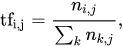

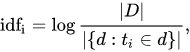

In [172]:
docs_strings = []
for doc in docs:
    s = ""
    for key, val in doc.items():
        for _ in range(val):
            s = s + " " + key
    docs_strings.append(s)

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(docs_strings) 
tfidf_df = pd.DataFrame(X.A, columns=vectorizer.get_feature_names_out())

In [204]:
for doc_ix in range(10):
    max_ix = np.argmax(tfidf_df.iloc[doc_ix, :])
    print(tfidf_df.columns[max_ix] , tfidf_df.iloc[doc_ix, :][max_ix])

prioritized 0.5108909059979517
duck 0.5423612381156384
injuries 0.42513667475581957
program 0.4774301376617018
clinton 0.5602370951997164
edison 0.3087450524990042
clinical_trial 0.5853952121760152
tax 0.4089360836160341
dnf 0.29343889560558994
alabama 0.33483412371460236


In [216]:
print(docs_info.iloc[1, :], '\n')
for key, val in docs[1].items():
    if val > 1:
        print(key, val)

data_set    nytimes
doc_id       297199
Name: 1, dtype: object 

accommodate 2
annual 2
bag 2
daily 2
duck 16
geese 7
goose 11
hunter 7
hunting 8
include 3
light 6
limit 5
open 3
portion 4
season 19
segment 2
set 4
statewide 3
waterfowl 3
western 2
zones 4
zzz_dark 4
zzz_texas_park 2
zzz_wildlife 2


In [226]:
most_important_words = []
for doc_ix in range(len(tfidf_df)):
    max_ix = np.argmax(tfidf_df.iloc[doc_ix, :])
    most_important_words.append(tfidf_df.columns[max_ix])

In [247]:
word_counter = Counter(most_important_words)
counts = pd.DataFrame(word_counts.most_common(10), columns=['word', 'count'])
fig = px.bar(counts,orientation='h', y='word', x='count')
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10}, title_text = "Common most important words")
fig.show()

In [237]:
indexes = []
for i in range(len(most_important_words)):
    if most_important_words[i] == 'november':
        indexes.append(i)

In [238]:
docs_info.iloc[indexes, :]

,data_set,doc_id
253,kos,2257
501,kos,1627
511,kos,2221
521,kos,1432
534,kos,262
...,...,...
7332,kos,580
7353,kos,606
7365,kos,2386
7384,kos,2267
